<a href="https://colab.research.google.com/github/suponev/model/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Массив M
(-0.4161468365471424-0.9092974268256817j)
(0.5403023058681398+0.8414709848078965j)

Массив А
(-3.999999999999999+3.9070366440125945e-16j)
(4.999999999999998-3.9070366440125945e-16j)

Массив m (сдвиги)
(-4-4.206595639493719e-17j)
(2-4.845676792606737e-17j)


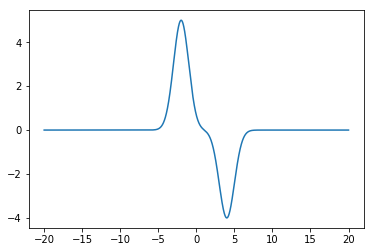

In [13]:
import random
import numpy as np 
import matplotlib.pyplot as plt

# Сигма
sig = 1

# Константа h
h = 0.5

# Массив значений x
x = np.arange(-20, 20 , 0.001);

# Задание сигнала
def signal(x):
    return 5*np.exp(-(x+2)**2/(2*sig**2))-4*np.exp(-(x-4)**2/(2*sig**2))
  
# Задание аппроксимирующей функции
def phi(x):
    return np.exp(-(x)**2/(2*sig**2))  
  
# Расчет мемента k (для исходного сигнала) 
def mu(x,k):
    return signal(x)*np.exp(-1j*k*h*x)
  
# Расчет alpha (для аппрокимирующей функции)
def alpha(x,k):
    return phi(x)*np.exp(-1j*h*k*x)
  
# Функция вывода массива
def printarr(arr , name):
    print(name)
    for i in range(len(arr)):
      print(arr[i])
    print('')

b = []
for k in [0,1,2,3]:
    #комплексные моменты исходного сигнала
    muk = np.trapz(mu(x,k), x);
    bk = muk/np.trapz(alpha(x,k), x);
    b.append(bk);
# print(b);

q1 = (b[1] * b[2] - b[0] * b[3]) / (b[1] * b[1] - b[0] * b[2]);
q0 = (b[1] * b[3] - b[2] * b[2]) / (b[1] * b[1] - b[0] * b[2]);
D = q1 * q1 - 4 * (-q0);
sqrt_D = np.sqrt(D);

m=[0,0] 
A=[0,0]

m[0] = (q1 - sqrt_D) / 2;
m[1] = (q1 + sqrt_D) / 2;


printarr(m,'Массив M')

A[0] = (b[1] - b[0] * m[1]) / (m[0] - m[1]);
A[1]= b[0] - A[0];

printarr(A,'Массив А')

print("Массив m (сдвиги)")
print(np.log(m[0])/h/1j)
print(np.log(m[1])/h/1j)

sp =np.fft.fft(signal(x))

# plt.plot(x, sp.real)
plt.plot(x , signal(x) )

plt.plot(x , signal(x) )
plt.show()



